In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('penguins.csv')
df = df.dropna()
df = df[df['species'] != 'Gentoo']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


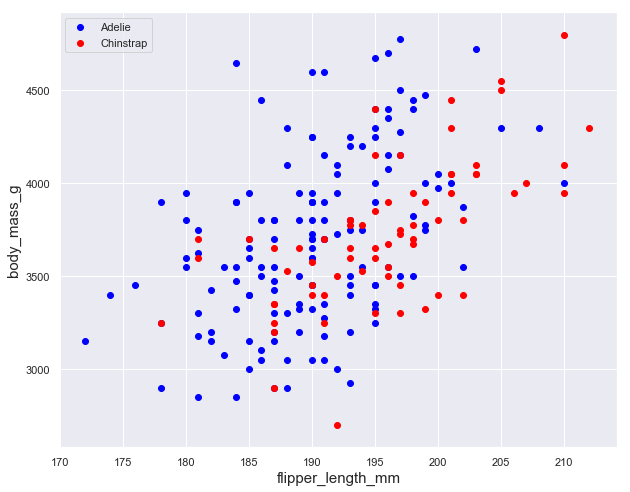

In [19]:
X = df[["flipper_length_mm", "body_mass_g"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap"]
colors = ["blue", "red"]

fig, ax = plt.subplots(figsize = (10, 8))
for penguin, color in zip(penguins, colors):
    temp_df = df[df.species == penguin]
    ax.scatter(temp_df.flipper_length_mm,
               temp_df.body_mass_g,
               c = color,
               label = penguin, 
               )
    
ax.set_xlabel("flipper_length_mm", fontsize = 15)
ax.set_ylabel("body_mass_g", fontsize = 15)
ax.legend()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


Stump Classification Report
              precision    recall  f1-score   support

           0       0.42      0.65      0.52        26
           1       0.80      0.62      0.70        60

    accuracy                           0.63        86
   macro avg       0.61      0.64      0.61        86
weighted avg       0.69      0.63      0.64        86
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        26
           1       0.78      0.75      0.76        60

    accuracy                           0.67        86
   macro avg       0.62      0.62      0.62        86
weighted avg       0.68      0.67      0.68        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        26
           1       0.80      0.72      0.75        60

    accuracy                           0.67        86
   macro avg       0.63      0.65      

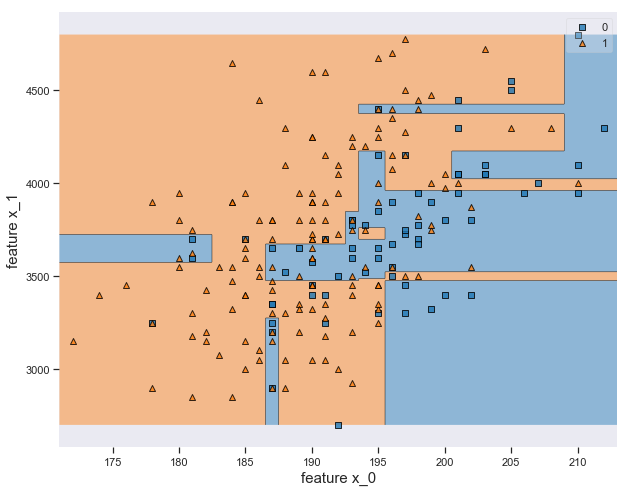

In [21]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

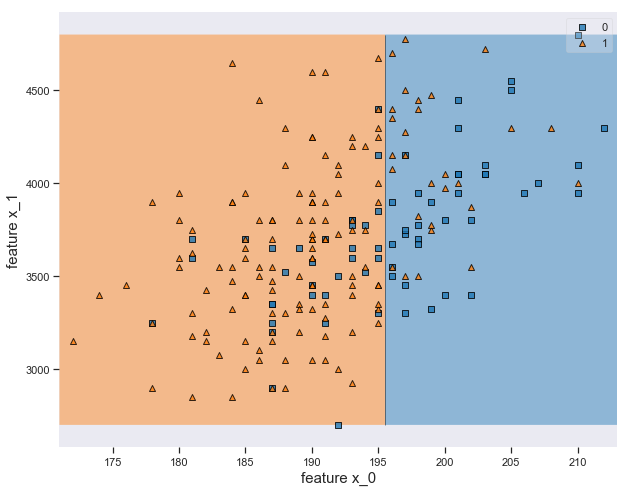

In [22]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.93      1.00      0.97        56

    accuracy                           0.95        86
   macro avg       0.97      0.93      0.95        86
weighted avg       0.96      0.95      0.95        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.95      0.98      0.96        56

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.95      0.98      0.96        56

    accuracy                           0.95        86
   macro avg       0.96      0.94     

In [24]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.48400000000000004
bill_depth_mm 0.11000000000000001
flipper_length_mm 0.3340000000000001
body_mass_g 0.07200000000000001
